In [15]:
import pandas as pd
import numpy as np
import os

In [16]:
file1 = pd.read_csv("static/year_season.csv")

In [17]:
rice_count = file1.loc[file1['Crop'] == 'Rice']
cotton_count = file1.loc[file1['Crop']== 'Cotton(lint)']
sugar_count = file1.loc[file1['Crop'] == 'Sugarcane']

In [18]:
total = pd.concat([rice_count, cotton_count,sugar_count])

In [19]:
total = total.drop(['Crop_Year'], axis=1)

In [20]:
total.reset_index()

,index,Rabi,Crop,Area,Production
0,13,Rabi,Rice,35600.0,75400.0
1,25,Rabi,Rice,18000.0,37300.0
2,38,Rabi,Rice,42300.0,84400.0
3,47,Rabi,Rice,57400.0,137400.0
4,58,Rabi,Rice,214100.0,429300.0
...,...,...,...,...,...
27538,245974,Rabi,Sugarcane,10.0,521.0
27539,245996,Rabi,Sugarcane,81.0,4168.8
27540,246016,Rabi,Sugarcane,7.0,289.3
27541,246031,Rabi,Sugarcane,1.0,52.0


In [21]:
total 

,Rabi,Crop,Area,Production
13,Rabi,Rice,35600.0,75400.0
25,Rabi,Rice,18000.0,37300.0
38,Rabi,Rice,42300.0,84400.0
47,Rabi,Rice,57400.0,137400.0
58,Rabi,Rice,214100.0,429300.0
...,...,...,...,...
245974,Rabi,Sugarcane,10.0,521.0
245996,Rabi,Sugarcane,81.0,4168.8
246016,Rabi,Sugarcane,7.0,289.3
246031,Rabi,Sugarcane,1.0,52.0


In [22]:
import keras
import keras.backend as kb
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Dense(32,  input_shape=[4]),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1 , activation = tf.nn.softmax)
  ])

In [23]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer)

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [26]:
X = total['Crop']

In [27]:
final = pd.get_dummies(total['Crop'])

In [28]:
final['Area'] = total.Area

In [66]:
model.fit(final , total['Production'], epochs=1)

Epoch 1/1
27543/27543 [==============================] - 2s 78us/step - loss: nan


In [34]:
a = total.Area

In [35]:
b = total.Production

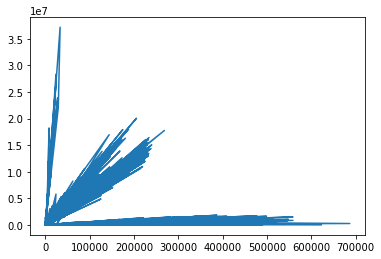

In [36]:
plt.plot(a,b)

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)

In [48]:
model_rf.fit(final , total['Production']) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=True,
                      random_state=100, verbose=0, warm_start=False)

In [50]:
model_rf.score(final, total['Production'])

0.963166802198718

In [45]:
total["Production"].fillna(total["Production"].mean(), inplace=True)

In [57]:
model_rf.predict([[0,0,1,45375]])

array([2972274.544])

In [58]:
model_rf.predict([[0,1,0,45375]])

array([118109.49236])

In [59]:
model_rf.predict([[1,0,0,45375]])

array([48260.62684])

In [83]:
rice=list()
sugar=list()
cotton = list()
for x in range(10000,10500):
    rice.append(model_rf.predict([[1,0,0,x]])[0])
    sugar.append(model_rf.predict([[0,1,0,x]])[0])
    cotton.append(model_rf.predict([[0,0,1,x]])[0])

In [84]:
num = list()
for x in range(10000,10500):
    num.append(x)
    

In [85]:
dataframe = { "Rice" : rice , "Sugarcane" : sugar , "Cotton" : cotton}

In [86]:
dataframe = pd.DataFrame(dataframe)

In [87]:
dataframe["Area"] = num

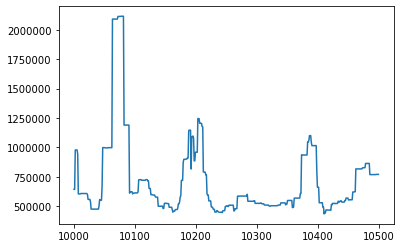

In [91]:
plt.plot(num,dataframe.Cotton)

In [92]:
dataframe.to_csv("static/produce_chart.csv")

In [113]:
rain_df = pd.read_csv("static/rainfall.csv")

In [114]:
rain_maha = rain_df.loc[rain_df['STATE/UT'] == 'MAHARASHTRA']

In [116]:
rain_maha =rain_maha.drop(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], axis =1)

In [117]:
rain_maha

,STATE/UT,DISTRICT,ANNUAL,JAN+FEB,MAM,JJAS,OND
482,MAHARASHTRA,MUMBAI CITY,2257.5,2.0,19.4,2142.4,93.7
483,MAHARASHTRA,RAIGAD,3278.9,0.4,22.2,3117.7,138.6
484,MAHARASHTRA,RATNAGIRI,3470.6,0.1,35.3,3261.5,173.7
485,MAHARASHTRA,THANE,2542.1,0.5,14.9,2428.3,98.4
486,MAHARASHTRA,SINDHUDURG,3269.2,0.4,63.6,3021.8,183.4
487,MAHARASHTRA,MUMBAI SUB,2257.5,2.0,19.4,2142.4,93.7
490,MAHARASHTRA,AHMEDNAGAR,573.2,1.9,29.9,437.6,103.8
491,MAHARASHTRA,DHULE,607.2,3.5,15.1,523.5,65.1
492,MAHARASHTRA,JALGAON,730.9,5.7,13.2,641.8,70.2
493,MAHARASHTRA,KOLHAPUR,1992.8,1.8,90.7,1737.6,162.7


In [118]:
year= list()
for x in range(1984,2019):
    year.append(x)
rain_maha["Year"] = year

In [119]:
rain_maha = rain_maha.drop(['DISTRICT','STATE/UT'],axis=1)

In [120]:
rain_maha.to_csv("rainfall_dataset.csv")

In [122]:
data_jf = pd.DataFrame({'Year' : rain_maha["Year"] , 'Rainfall': rain_maha["JAN+FEB"] })

In [123]:
data_mam = pd.DataFrame({'Year' : rain_maha["Year"] , 'Rainfall': rain_maha["MAM"] })

In [124]:
data_jjas = pd.DataFrame({'Year' : rain_maha["Year"] , 'Rainfall': rain_maha["JJAS"] })

In [125]:
data_ons = pd.DataFrame({'Year' : rain_maha["Year"] , 'Rainfall': rain_maha["OND"] })

In [126]:
data_jf.to_csv("rain_jf.csv")

In [127]:
data_mam.to_csv("rain_mam.csv")

In [128]:
data_jjas.to_csv("rain_jjas.csv")

In [130]:
data_ons.to_csv('rain_ons.csv')

In [ ]:
x